In [64]:
import numpy as np
import pandas as pd

data_df = pd.read_csv("./winequality-red2.csv", header = 0 , engine="python")
print(f"data_df 의 크기 : {data_df.shape}")
data_df.head()

data_df 의 크기 : (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [65]:
data_df = data_df.drop(["chlorides","free sulfur dioxide","total sulfur dioxide","pH","sulphates"], axis=1, inplace=False)

data_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,density,alcohol,quality
0,7.4,0.70,0.00,1.9,0.9978,9.4,5
1,7.8,0.88,0.00,2.6,0.9968,9.8,5
2,7.8,0.76,0.04,2.3,0.9970,9.8,5
3,11.2,0.28,0.56,1.9,0.9980,9.8,6
4,7.4,0.70,0.00,1.9,0.9978,9.4,5


In [66]:
# 기본 컬럼 조사, info()
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fixed acidity     1599 non-null   float64
 1   volatile acidity  1599 non-null   float64
 2   citric acid       1599 non-null   float64
 3   residual sugar    1599 non-null   float64
 4   density           1599 non-null   float64
 5   alcohol           1599 non-null   float64
 6   quality           1599 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 87.6 KB


In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [68]:
Y = data_df["quality"]

X = data_df.drop(["quality"], axis= 1 , inplace= False)

In [69]:
X_train, X_test, Y_train , Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

In [70]:
print(f"X_train : {X_train.shape},X_test : {X_test.shape},Y_train : {Y_train.shape},Y_test : {Y_test.shape}")

X_train : (1119, 6),X_test : (480, 6),Y_train : (1119,),Y_test : (480,)


In [71]:
lr = LinearRegression()

In [72]:
lr.fit(X_train, Y_train)

LinearRegression()

In [73]:
y_predict = lr.predict(X_test)

In [74]:
# 평가 분석 지표
# MSE : 오류의 제곱 평균
# R^2 Score :  예측값 / 실제값 나눈 비율
#Y_test : 답지, y_predict : 상용이가 학습해서, 시험친 결과
mse = mean_squared_error(Y_test, y_predict)
# 4 -> 루트 4 -> 2, 값을 통일 시켰다. 나중에, 스케일링을 많이 함, 정규화 등으로 고쳐야,
# 통계시, 효율적으로 작업이 진행되므로, 그래서, 이런 작업을 많이 함.
rmse = np.sqrt(mse)

r2_value = r2_score(Y_test,y_predict)

print(f"mse : {mse}, rmse : {rmse} ,r2_value : {r2_value}")

mse : 0.423081066073208, rmse : 0.650446820326772 ,r2_value : 0.28291344733354573


In [75]:
# 선형 회귀 분석, 직선의 구성 요소 ,
#  y절편, 계수등에 대해서, 직선을 분석 해보기.
print(f"Y 절편의 값 : {lr.intercept_}")
# 독립변수의 계수값
print(f"회귀 계수의 값 : {np.round(lr.coef_,2)}")

Y 절편의 값 : 12.230139671279549
회귀 계수의 값 : [ 0.06 -1.52 -0.23  0.   -9.46  0.31]


In [76]:
coef = pd.Series(data=np.round(lr.coef_,2), index= X.columns)
coef.sort_values(ascending = False)

alcohol             0.31
fixed acidity       0.06
residual sugar      0.00
citric acid        -0.23
volatile acidity   -1.52
density            -9.46
dtype: float64

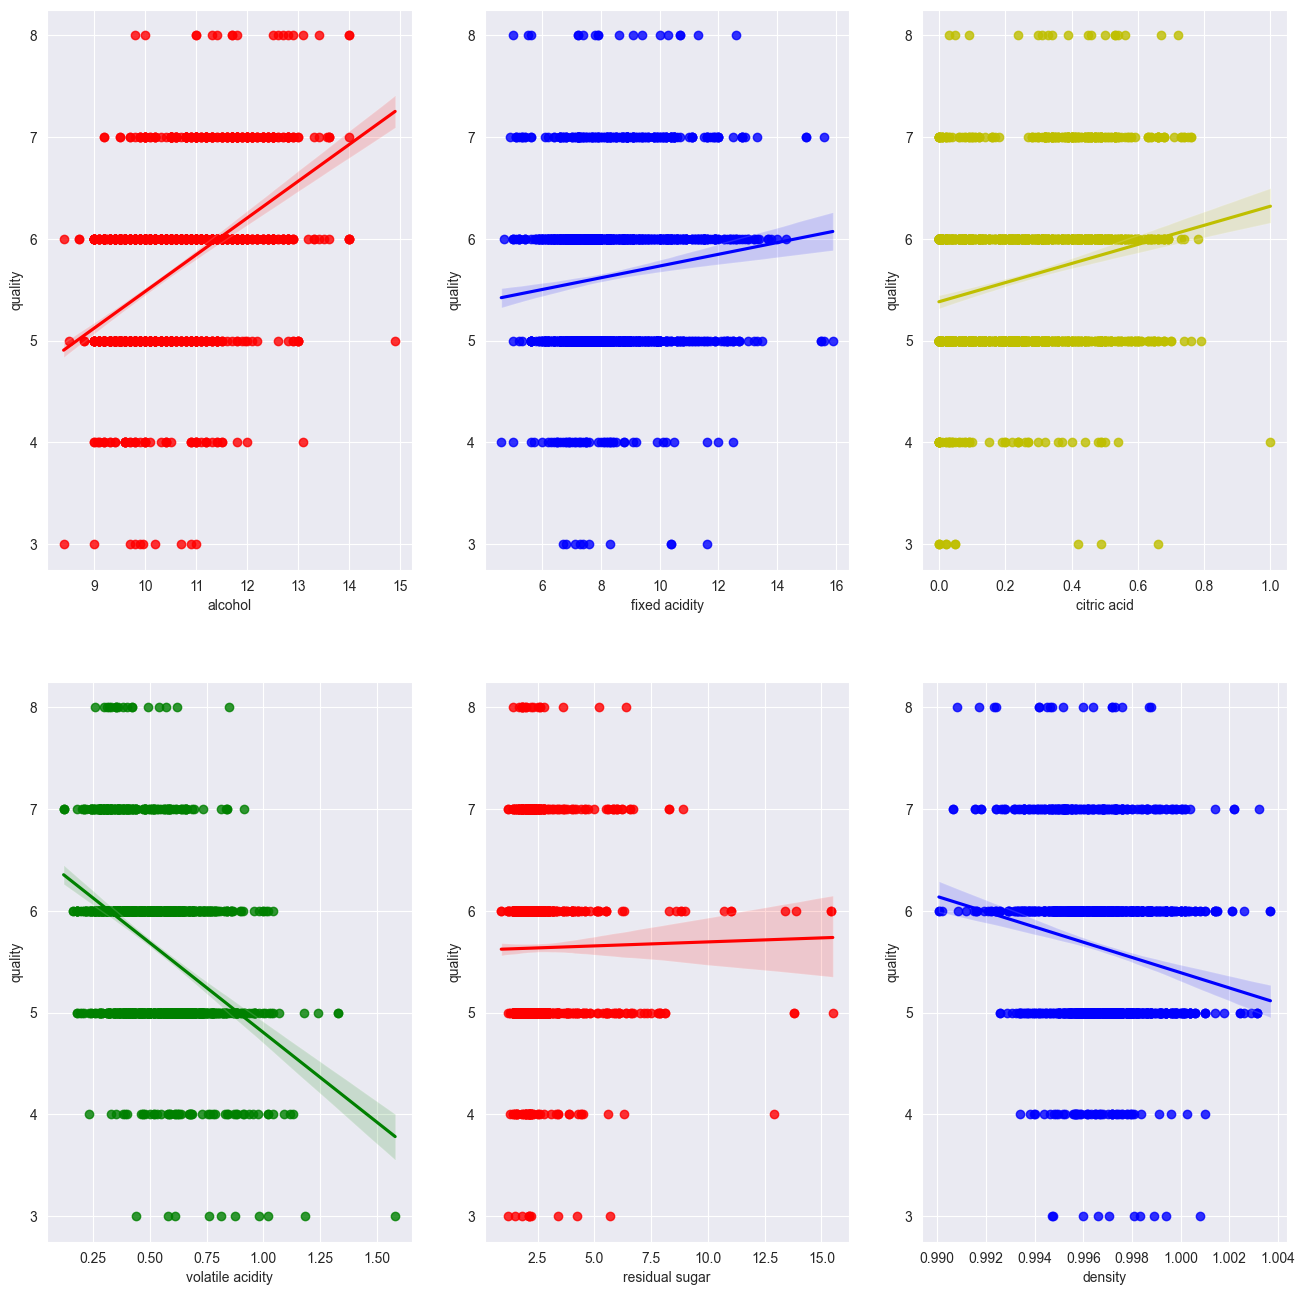

In [79]:
# 학습된 모델을 통해서, 예측값도 구하고, 실제값과 비교도하고, MSE R^2 , 평가 지표
# 학습된 모델의 예측값, 실제값과 얼마나 일치하는 지를 조사.
# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 이미지들을 , 2 x 3 , 표 형태로 나타내기.
fig, axs = plt.subplots(figsize = (16,16), ncols = 3, nrows = 2)

x_features = ["alcohol", "fixed acidity", "citric acid", "volatile acidity","residual sugar", "density"]

# 그래프의 색상 옵션
plot_color = ["r","b", "y", "g", "r","b"]

for i, feature in enumerate(x_features):
  # 몫 -> 2개 행으로
  row = int(i/3)
  # 나머지 -> 0,1,2 반복
  col = i % 3
  sns.regplot(x = feature, y="quality", data = data_df, ax = axs[row][col], color = plot_color[i])